# Walmart Sales Analysis:

# A. Analyze the performance of sales and revenue at the city and branch level

In [3]:
# Importing libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# URL of the Excel file
url= 'WalmartSales.xlsx'
# Read the Excel file into a pandas DataFrame
walmart = pd.read_excel(url)

In [35]:
# Display the first few rows of the DataFrame
walmart.head()



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Total Revenue,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1,522.83,January
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,Cash,9.6,76.40,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,324.31,March
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4,465.76,January
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3,604.17,February


# **CITY WISE SALES**

In [6]:
# Grouping the Walmart DataFrame by 'City' and calculating the sum of 'Quantity' for each city
city_wise_sales = walmart.groupby('City')['Quantity'].sum().reset_index()

# Renaming the column representing total sales ('Quantity') to 'Total Sales'
city_wise_sales = city_wise_sales.rename(columns={'Quantity': 'Total Sales'})

In [7]:
# Displaying the DataFrame city_wise_sales
city_wise_sales

,City,Total Sales
0,Mandalay,1820
1,Naypyitaw,1831
2,Yangon,1859


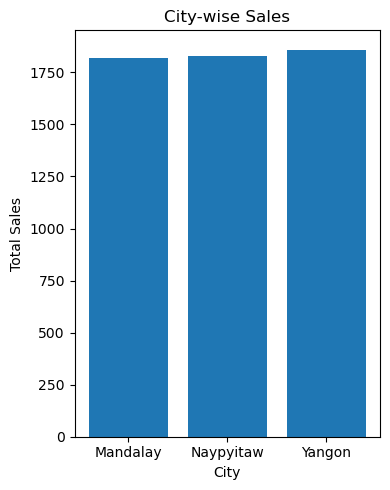

In [8]:
# Creating the bar plot using matplotlib
plt.figure(figsize=(4, 5))
plt.bar(city_wise_sales['City'], city_wise_sales['Total Sales'])
plt.title('City-wise Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


**Yangon has the highest total sales at 1859 units, followed closely by Naypyitaw at 1831 units, while Mandalay has the lowest total sales at 1820 units.**

# **BRANCH WISE SALE**

In [9]:
# Grouping the Walmart data by 'Branch' and calculating the total quantity sold in each branch
branch_wise_sales = walmart.groupby('Branch')['Quantity'].sum().reset_index()

# Renaming the column representing total sales ('Quantity') to 'Total Sales'
branch_wise_sales = branch_wise_sales.rename(columns={'Quantity': 'Total Sales'})

In [10]:
# Displaying the DataFrame branch_wise_sales
branch_wise_sales

,Branch,Total Sales
0,A,1883
1,B,1899
2,C,1728


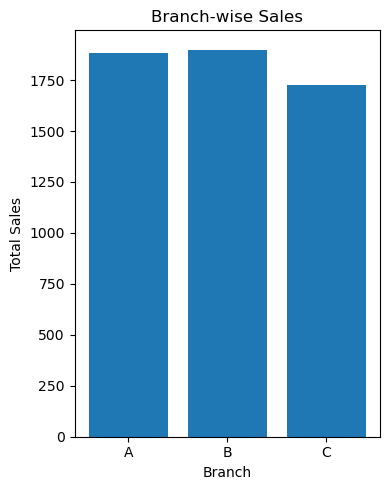

In [11]:
# Creating the bar plot using matplotlib
plt.figure(figsize=(4,5))
plt.bar(branch_wise_sales['Branch'], branch_wise_sales['Total Sales'])
plt.title('Branch-wise Sales')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


**Branch B leads with the highest total sales of 1899 units, followed by branch A with 1883 units. Branch C shows the lowest total sales at 1728 units.**

# **BRANCH AND CITY WISE SALES**

In [12]:
# Grouping the Walmart data by both 'City' and 'Branch' and calculating the total quantity sold in each city-branch combination
branch_and_city_wise_sale= walmart.groupby(['City', 'Branch'])['Quantity'].sum().reset_index()

In [13]:
# Displaying the DataFrame branch_and_city_wise_sale
branch_and_city_wise_sale

,City,Branch,Quantity
0,Mandalay,A,637
1,Mandalay,B,664
2,Mandalay,C,519
3,Naypyitaw,A,648
4,Naypyitaw,B,604
5,Naypyitaw,C,579
6,Yangon,A,598
7,Yangon,B,631
8,Yangon,C,630


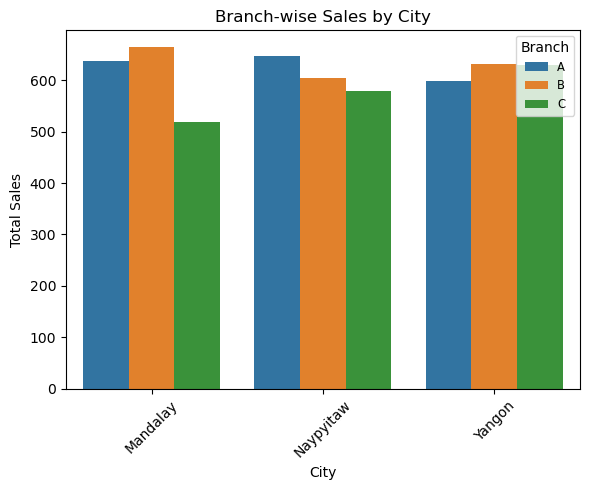

In [14]:
# Creating the bar plot using matplotlib
plt.figure(figsize=(6, 5))
sns.barplot(x='City', y='Quantity', hue='Branch', data=branch_and_city_wise_sale)
plt.title('Branch-wise Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) 
plt.legend(title='Branch', fontsize='small')
plt.tight_layout()
plt.show()

**Branch B generally has the highest sales in Mandalay and Yangon, while branch A leads in Naypyitaw.**

# **CITY WISE REVENUE**

In [15]:
# Calculating the total revenue.
walmart['Total Revenue'] = walmart['Unit price'] * walmart['Quantity']

In [16]:
# Group the data by 'City' and sum up the total revenue for each city
city_wise_revenue = walmart.groupby('City')['Total Revenue'].sum().reset_index()

In [17]:
# Display the city-wise revenue
city_wise_revenue

,City,Total Revenue
0,Mandalay,101140.64
1,Naypyitaw,105303.53
2,Yangon,101143.21


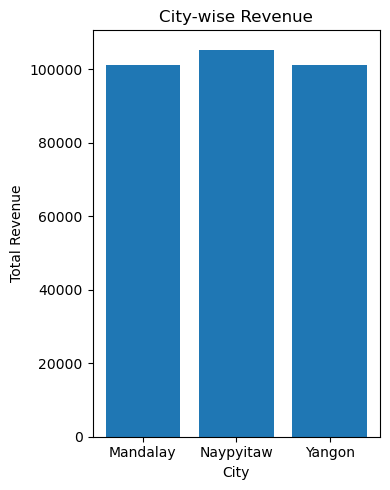

In [33]:
# Create the bar plot using matplotlib
plt.figure(figsize=(4,5))
plt.bar(city_wise_revenue['City'], city_wise_revenue['Total Revenue'])
plt.title('City-wise Revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


**Naypyitaw leads with the highest total revenue, followed closely by Mandalay, and Yangon.**

# **BRANCH WISE REVENUE**

In [19]:
# Calculating the total revenue for each branch
branch_wise_revenue = walmart.groupby('Branch')['Total Revenue'].sum().reset_index()
# Displaying the branch wise revenue
branch_wise_revenue

,Branch,Total Revenue
0,A,103763.00
1,B,107567.19
2,C,96257.19


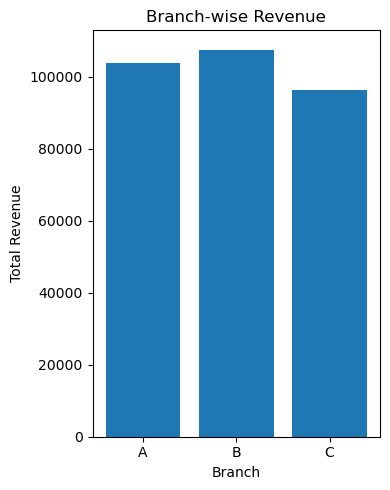

In [20]:
# Create the bar plot using Matplotlib
plt.figure(figsize=(4,5))
plt.bar(branch_wise_revenue['Branch'], branch_wise_revenue['Total Revenue'])
plt.title('Branch-wise Revenue')
plt.xlabel('Branch')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


**Branch B has the highest revenue, followed by branch A and branch C.**

# **CITY AND BRANCH WISE REVENUE**

In [21]:
# Grouping the Walmart data by both 'City' and 'Branch' and calculating the total revenue for each city-branch combination
branch_and_city_wise_revenue= walmart.groupby(['City', 'Branch'])['Total Revenue'].sum().reset_index()
# Displaying the branch and city wise revenue
branch_and_city_wise_revenue

,City,Branch,Total Revenue
0,Mandalay,A,34130.09
1,Mandalay,B,37215.93
2,Mandalay,C,29794.62
3,Naypyitaw,A,35985.64
4,Naypyitaw,B,35157.75
5,Naypyitaw,C,34160.14
6,Yangon,A,33647.27
7,Yangon,B,35193.51
8,Yangon,C,32302.43


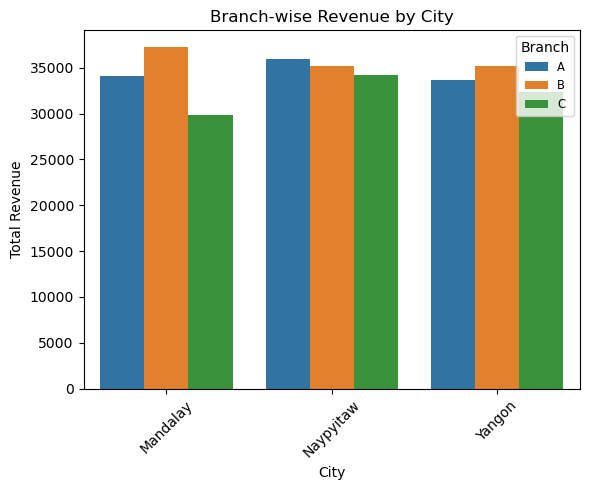

In [22]:
# Creating the bar plot using matplotlib
plt.figure(figsize=(6, 5))
sns.barplot(x='City', y='Total Revenue', hue='Branch', data=branch_and_city_wise_revenue)
plt.title('Branch-wise Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45) 
plt.legend(title='Branch', fontsize='small')
plt.tight_layout()
plt.show()


**Branch B generally leads in revenue across all cities, followed by branch A in Mandalay and Naypyitaw, while in Yangon, branch B leads followed by branch A.**

# **B. What is the average price of an item sold at each branch of the city**

In [34]:
# Grouping the data by both 'City' and 'Branch' and calculating the average price of an item sold
average_price_per_branch_city = walmart.groupby(['City', 'Branch'])['Unit price'].mean().reset_index()

In [25]:
# Displayng average price per branch of the city
average_price_per_branch_city

,City,Branch,Unit price
0,Mandalay,A,53.353866
1,Mandalay,B,56.133305
2,Mandalay,C,57.958316
3,Naypyitaw,A,54.123182
4,Naypyitaw,B,57.785688
5,Naypyitaw,C,57.941009
6,Yangon,A,55.639298
7,Yangon,B,56.011062
8,Yangon,C,52.684602


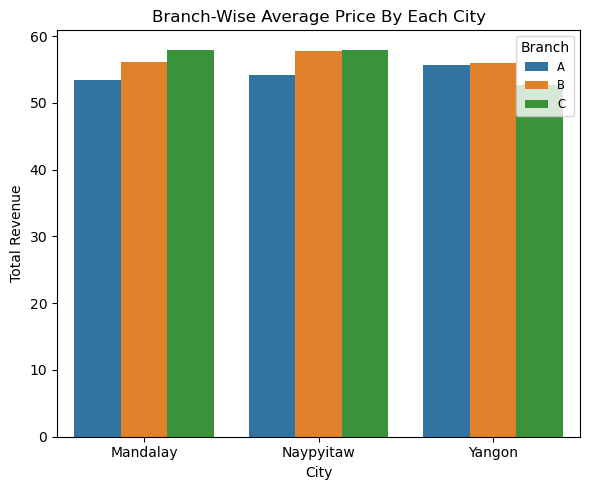

In [62]:
plt.figure(figsize=(6, 5))
sns.barplot(x='City', y='Unit price', hue='Branch', data=average_price_per_branch_city)
plt.title('Branch-Wise Average Price By Each City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.legend(title='Branch', fontsize='small')
plt.tight_layout()
plt.show()


**Branch C in Mandalay has the highest unit price, followed by branch C in Naypyitaw, and branch A in Yangon.**

# **C. Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019.**

In [27]:
walmart.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Total Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17


In [28]:
# Extract Month and year from 'Date' column
walmart['Date'] = pd.to_datetime(walmart['Date'])
walmart['Month'] = walmart['Date'].dt.strftime('%B')
walmart['Month']


0       January
1         March
2         March
3       January
4      February
         ...   
995     January
996       March
997    February
998    February
999    February
Name: Month, Length: 1000, dtype: object

# **PRODUCT LINE WISE ANALYSIS**

In [69]:
product_line= walmart.groupby(['Product line', 'Month']).agg({'Quantity': 'sum', 'Total Revenue': 'sum'}).reset_index()
product_line

,Product line,Month,Quantity,Total Revenue
0,Electronic accessories,February,313,16536.10
1,Electronic accessories,January,333,17934.56
2,Electronic accessories,March,325,17279.37
3,Fashion accessories,February,295,18104.63
4,Fashion accessories,January,336,18423.92
5,Fashion accessories,March,271,15191.35
6,Food and beverages,February,349,19047.96
7,Food and beverages,January,325,18638.60
8,Food and beverages,March,278,15784.72
9,Health and beauty,February,266,13906.91


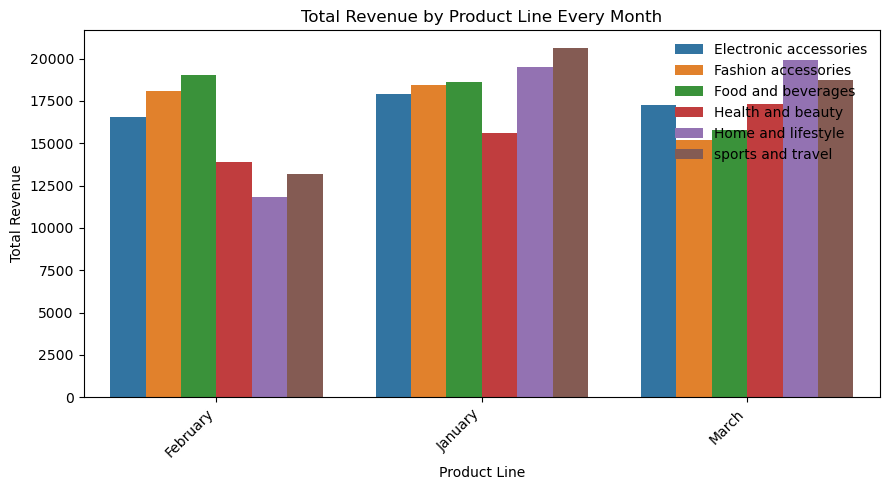

In [67]:
# Creating a bar plot
plt.figure(figsize=(9, 5))
sns.barplot(data=product_line, x='Month', y='Total Revenue', hue='Product line', errorbar=None)
plt.title('Total Revenue by Product Line Every Month')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product line', fontsize='small')
plt.legend(['Electronic accessories', 'Fashion accessories','Food and beverages', 'Health and beauty','Home and lifestyle','sports and travel'], frameon=False, loc='upper right')
plt.tight_layout()
plt.show()






**In January, 375 units of Sports and travel products were sold, generating a total revenue of $20,635.26.**

# **GENDER WISE ANALYSIS**

In [38]:
Gender_wise= walmart.groupby(['Gender', 'Month']).agg({'Quantity': 'sum', 'Total Revenue': 'sum'}).reset_index()

In [39]:
Gender_wise

,Gender,Month,Quantity,Total Revenue
0,Female,February,951,53652.91
1,Female,January,1019,56322.84
2,Female,March,899,49912.75
3,Male,February,703,38936.97
4,Male,January,946,54431.32
5,Male,March,992,54330.59


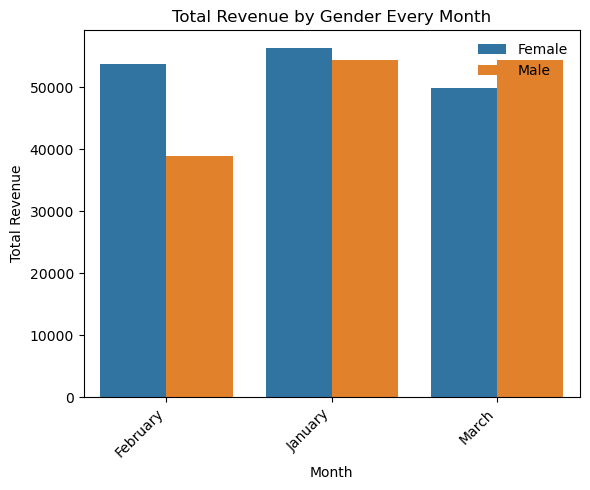

In [55]:
plt.figure(figsize=(6, 5))
sns.barplot(data=Gender_wise, x='Month', y='Total Revenue', hue='Gender', errorbar=None)
plt.title('Total Revenue by Gender Every Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(['Female','Male'], frameon=False, loc='upper right')
plt.tight_layout()
plt.show()

**The highest total revenue is generated by females in January, with a total revenue of $56,322.84.**

# **PAYMENT METHOD WISE ANALYSIS**

In [41]:
Payment_method= walmart.groupby(['Payment', 'Month']).agg({'Quantity': 'sum', 'Total Revenue': 'sum'}).reset_index()

In [42]:
Payment_method

,Payment,Month,Quantity,Total Revenue
0,Cash,February,596,34044.13
1,Cash,January,708,39781.03
2,Cash,March,592,33038.24
3,Credit card,February,505,29866.69
4,Credit card,January,622,36425.31
5,Credit card,March,595,29676.64
6,Ewallet,February,553,28679.06
7,Ewallet,January,635,34547.82
8,Ewallet,March,704,41528.46


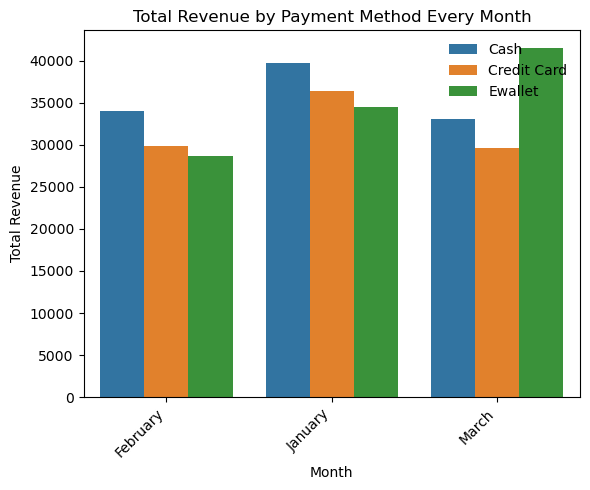

In [56]:
plt.figure(figsize=(6, 5))
sns.barplot(data=Payment_method, x='Month', y='Total Revenue', hue='Payment', errorbar=None)
plt.title('Total Revenue by Payment Method Every Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(['Cash','Credit Card','Ewallet'], frameon=False, loc='upper right')
plt.tight_layout()
plt.show()

**The highest total revenue is generated through Ewallet payments in March, totaling $41,528.46.**

**The lowest total revenue is generated through Credit card payments in February, totaling $29,866.69.**

# FOCUS AREAS TO IMPROVE SALES FOR APRIL 2019


**FASHION ACCESSORIES AND FOOD & BEVERAGES:**
Focus on marketing strategies or promotions to boost sales in April.


**MALE CUSTOMERS:**
Implement targeted marketing campaigns to attract male customers in April.


**CASH AND CREDIT CARD PAYMENTS:**
Consider offering discounts or incentives for customers using these payment methods to increase sales in April.






# 2. APP EXPLORATION: 


 **Explore the features and user experience of the Jar app. Identify two aspects that
 you think could be significantly improved and explain your reasoning behind each
 suggestion.**

**LIMITED INVESTMENT OPTIONS:**
Adding more investment choices to the Jar app would make it more attractive and useful for users. Right now, the app mainly lets you invest in digital gold, which is a cool idea. But if it also offered things like mutual funds, stocks, or bonds, more people might be interested.




**JAR PRIORITIZES TRANSACTIONS, BUT USERS NEED EDUCATION!**
**Include resources like:**
- Investment tutorials: Explain key concepts, risks, and strategies.
- Interactive risk calculators: Help users assess their risk tolerance.
- Goal-setting guides: Assist users in defining financial goals and choosing investments.

# 3. PRODUCT OPTIMIZATION: 
**The Jar app has an engagement feature called 'Spin to Win'.
Right now, if 100 people come to the app each day, only 23 of them try out this
spinning game. But, we know that people who spin are more likely to retain on the
app and do transactions.
Now, we want to get more people to play the game. So, the question is, how can we
make sure that at least 50 people out of every 100 who visit the app each day will
play 'Spin to Win'? What can we do to get more people interested in spinning the
wheel?**

**INCENTIVES AND REWARDS:**
1. Offer discounts, coupons, exclusive offers, or virtual currency.
2. Encourage more users to engage with the game.

**GAMIFICATION ELEMENTS:**
1. Enhance visuals, sound effects, and animations.
2. Make the spinning experience enjoyable and interactive.